In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [145]:
# !pip install skimpy

In [146]:
# pip install cmfrec

In [4]:
import cmfrec

In [5]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# datasets

ratings = pd.read_csv('/content/drive/MyDrive/Scaler/datasets/zee rat.csv')
users = pd.read_csv('/content/drive/MyDrive/Scaler/datasets/zee user.csv')
movies = pd.read_csv('/content/drive/MyDrive/Scaler/datasets/zee movie.csv',encoding='ISO-8859-1')

In [8]:
# cleaning column names

from skimpy import clean_columns

movies = clean_columns(movies, case = 'snake')
ratings = clean_columns(ratings, case = 'snake')
users = clean_columns(users, case = 'snake')

3 column names have been cleaned

4 column names have been cleaned

5 column names have been cleaned

In [9]:
# finding shapes

ratings.shape,movies.shape,users.shape

((1000209, 4), (3883, 3), (6040, 5))

In [10]:
ratings.dropna(inplace=True)

ratings.isnull().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [11]:
# converting timestamps to datetime format

from datetime import datetime
  
ratings['date'] = [datetime.fromtimestamp(i).strftime('%d-%m-%Y') for i in ratings.timestamp]


ratings['hours'] = ratings['timestamp'].apply(lambda x: datetime.fromtimestamp(x).hour)

In [12]:
ratings['date'] = ratings['date'].astype(np.datetime64)

In [13]:
# finding nuniques()

print('_'*40)
print('RATINGS NUNIQUES','\n')
for i in ratings:
    print(i ,':',ratings[i].nunique())

    
print('_'*40)
    
print('MOVIES NUNIQUES','\n')
for i in movies:
    print(i ,':',movies[i].nunique())
    
    
    
print('_'*40)
    
print('USERS NUNIQUES','\n')
for i in users:
    print(i ,':',users[i].nunique())
print('_'*40)

________________________________________
RATINGS NUNIQUES 

user_id : 6040
movie_id : 3706
rating : 5
timestamp : 458455
date : 1040
hours : 24
________________________________________
MOVIES NUNIQUES 

movie_id : 3883
title : 3883
genres : 301
________________________________________
USERS NUNIQUES 

user_id : 6040
gender : 2
age : 7
occupation : 21
zip_code : 3439
________________________________________


In [14]:
# finding missing values

ratings.isnull().sum(), movies.isnull().sum(), users.isnull().sum()

(user_id      0
 movie_id     0
 rating       0
 timestamp    0
 date         0
 hours        0
 dtype: int64,
 movie_id    0
 title       0
 genres      0
 dtype: int64,
 user_id       0
 gender        0
 age           0
 occupation    0
 zip_code      0
 dtype: int64)

***No missing values found in all three datasets***

In [15]:
# finding duplicates

ratings.duplicated().sum(),movies.duplicated().sum(),users.duplicated().sum()

(0, 0, 0)

***ratings dataset has 24 duplicate rows***

In [16]:
# removing duplicates 

ratings.drop_duplicates(inplace=True)
ratings.duplicated().sum()

0

---
**___DESCRIBE AND INFO___**

In [17]:
print('RATINGS INFO AND DESCRIBE','\n')
pd.options.display.float_format='{:.2f}'.format
ratings.describe(),ratings.info()

RATINGS INFO AND DESCRIBE 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   user_id    1000209 non-null  int64         
 1   movie_id   1000209 non-null  int64         
 2   rating     1000209 non-null  int64         
 3   timestamp  1000209 non-null  int64         
 4   date       1000209 non-null  datetime64[ns]
 5   hours      1000209 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 53.4 MB


(         user_id   movie_id     rating     timestamp      hours
 count 1000209.00 1000209.00 1000209.00    1000209.00 1000209.00
 mean     3024.51    1865.54       3.58  972243695.40      11.92
 std      1728.41    1096.04       1.12   12152558.94       7.89
 min         1.00       1.00       1.00  956703932.00       0.00
 25%      1506.00    1030.00       3.00  965302637.00       4.00
 50%      3070.00    1835.00       4.00  973018006.00      14.00
 75%      4476.00    2770.00       4.00  975220939.00      19.00
 max      6040.00    3952.00       5.00 1046454590.00      23.00,
 None)

In [18]:
ratings.describe(include = np.number, percentiles=[.10,.25,.75,.90,.95, .99]).round(2).T.astype(int)

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
user_id,1000209,3024,1728,1,669,1506,3070,4476,5443,5740,5978,6040
movie_id,1000209,1865,1096,1,357,1030,1835,2770,3430,3675,3871,3952
rating,1000209,3,1,1,2,3,4,4,5,5,5,5
timestamp,1000209,972243695,12152558,956703932,960681570,965302637,973018006,975220939,978133376,993074152,1029360403,1046454590
hours,1000209,11,7,0,1,4,14,19,22,23,23,23


---

In [19]:
print('MOVIES INFO AND DESCRIBE','\n')
pd.options.display.float_format='{:.2f}'.format
movies.describe(),movies.info()

MOVIES INFO AND DESCRIBE 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


(       movie_id
 count   3883.00
 mean    1986.05
 std     1146.78
 min        1.00
 25%      982.50
 50%     2010.00
 75%     2980.50
 max     3952.00,
 None)

In [20]:
movies.describe(include=object)

,title,genres
count,3883,3883
unique,3883,301
top,Toy Story (1995),Drama
freq,1,843


In [21]:
movies.describe(include = np.number, percentiles=[.10,.25,.75,.90,.95, .99]).round(2).T.astype(int)

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
movie_id,3883,1986,1146,1,392,982,2010,2980,3562,3756,3913,3952


---

In [22]:
print('USERS INFO AND DESCRIBE','\n')
pd.options.display.float_format='{:.2f}'.format
users.describe(),users.info()

USERS INFO AND DESCRIBE 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zip_code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


(       user_id     age  occupation
 count  6040.00 6040.00     6040.00
 mean   3020.50   30.64        8.15
 std    1743.74   12.90        6.33
 min       1.00    1.00        0.00
 25%    1510.75   25.00        3.00
 50%    3020.50   25.00        7.00
 75%    4530.25   35.00       14.00
 max    6040.00   56.00       20.00,
 None)

In [23]:
users.describe(include=object)

,gender,zip_code
count,6040,6040
unique,2,3439
top,M,48104
freq,4331,19


In [24]:
users.describe(include = np.number, percentiles=[.10,.25,.75,.90,.95, .99]).round(2).T.astype(int)

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
user_id,6040,3020,1743,1,604,1510,3020,4530,5436,5738,5979,6040
age,6040,30,12,1,18,25,25,35,50,56,56,56
occupation,6040,8,6,0,0,3,7,14,17,19,20,20


**___DESCRIBE AND INFO ENDS___**

---

In [25]:
ratings.head()

,user_id,movie_id,rating,timestamp,date,hours
0,1,1193,5,978300760,2000-12-31,22
1,1,661,3,978302109,2000-12-31,22
2,1,914,3,978301968,2000-12-31,22
3,1,3408,4,978300275,2000-12-31,22
4,1,2355,5,978824291,2001-06-01,23


In [26]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
users.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455


In [28]:
# merging all three datasets

df = ratings.merge(users,on='user_id', how='inner')
df = df.merge(movies,on='movie_id', how='inner')

In [29]:
# creating new feature release year


df['release_year']  = df['title'].str.extract(r'([\d]+)')
df['title'] = df['title'].replace('[0-9]','',regex=True).str.strip('()')

In [30]:
df['release_year'] = df['release_year'].astype(int)

In [31]:
df = df[df['release_year'].between(df['release_year'].quantile(.04),
                                   df['release_year'].quantile(.999),
                                   inclusive=True)]

In [32]:
df['title'] = df['title'].str.lstrip('(')
df['title'] = df['title'].str.lstrip(')')

In [33]:
df.shape

(959268, 13)

In [34]:
df.head()

,user_id,movie_id,rating,timestamp,date,hours,gender,age,occupation,zip_code,title,genres,release_year
0,1,1193,5,978300760,2000-12-31,22,F,1,10,48067,One Flew Over the Cuckoo's Nest,Drama,1975
1,2,1193,5,978298413,2000-12-31,21,M,56,16,70072,One Flew Over the Cuckoo's Nest,Drama,1975
2,12,1193,4,978220179,2000-12-30,23,M,25,12,32793,One Flew Over the Cuckoo's Nest,Drama,1975
3,15,1193,4,978199279,2000-12-30,18,M,25,7,22903,One Flew Over the Cuckoo's Nest,Drama,1975
4,17,1193,5,978158471,2000-12-30,6,M,50,1,95350,One Flew Over the Cuckoo's Nest,Drama,1975


In [35]:
df = df[df['age'].between(df['age'].quantile(.03),
                                   df['age'].quantile(1),
                                   inclusive=True)]

In [36]:
df.head()

,user_id,movie_id,rating,timestamp,date,hours,gender,age,occupation,zip_code,title,genres,release_year
1,2,1193,5,978298413,2000-12-31,21,M,56,16,70072,One Flew Over the Cuckoo's Nest,Drama,1975
2,12,1193,4,978220179,2000-12-30,23,M,25,12,32793,One Flew Over the Cuckoo's Nest,Drama,1975
3,15,1193,4,978199279,2000-12-30,18,M,25,7,22903,One Flew Over the Cuckoo's Nest,Drama,1975
4,17,1193,5,978158471,2000-12-30,6,M,50,1,95350,One Flew Over the Cuckoo's Nest,Drama,1975
5,18,1193,4,978156168,2000-12-30,6,F,18,3,95825,One Flew Over the Cuckoo's Nest,Drama,1975


### ***Apriori*** ***Algorithm***

#### ***Recommendations according to  movie title***

In [37]:
df

,user_id,movie_id,rating,timestamp,date,hours,gender,age,occupation,zip_code,title,genres,release_year
1,2,1193,5,978298413,2000-12-31,21,M,56,16,70072,One Flew Over the Cuckoo's Nest,Drama,1975
2,12,1193,4,978220179,2000-12-30,23,M,25,12,32793,One Flew Over the Cuckoo's Nest,Drama,1975
3,15,1193,4,978199279,2000-12-30,18,M,25,7,22903,One Flew Over the Cuckoo's Nest,Drama,1975
4,17,1193,5,978158471,2000-12-30,6,M,50,1,95350,One Flew Over the Cuckoo's Nest,Drama,1975
5,18,1193,4,978156168,2000-12-30,6,F,18,3,95825,One Flew Over the Cuckoo's Nest,Drama,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,2000-05-20,18,M,18,17,47901,Modulations,Documentary,1998
1000205,5675,2703,3,976029116,2000-05-12,15,M,35,14,30030,Broken Vessels,Drama,1998
1000206,5780,2845,1,958153068,2000-12-05,17,M,18,17,92886,White Boys,Drama,1999
1000207,5851,3607,5,957756608,2000-08-05,3,F,18,20,55410,One Little Indian,Comedy|Drama|Western,1973


In [38]:
df1 = df.sample(700000)

In [39]:
df1['user_id'] = df1.user_id.astype(object)
df1['movie_id'] = df1.movie_id.astype(object)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700000 entries, 450840 to 829031
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       700000 non-null  object        
 1   movie_id      700000 non-null  object        
 2   rating        700000 non-null  int64         
 3   timestamp     700000 non-null  int64         
 4   date          700000 non-null  datetime64[ns]
 5   hours         700000 non-null  int64         
 6   gender        700000 non-null  object        
 7   age           700000 non-null  int64         
 8   occupation    700000 non-null  int64         
 9   zip_code      700000 non-null  object        
 10  title         700000 non-null  object        
 11  genres        700000 non-null  object        
 12  release_year  700000 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 74.8+ MB


In [40]:
data = df1.groupby(['user_id','title'])['movie_id'].sum().unstack().reset_index().fillna(0).set_index('user_id')

In [41]:
data[data.index == 6036].sum(axis=1)

user_id
6036    1186000
dtype: int64

In [42]:
data = (data>0).astype(int)

In [43]:
data[data.index == 6036].sum(axis=1)

user_id
6036    635
dtype: int64

In [44]:
data.head()

title,'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,: A Space Odyssey,A Chef in Love,Abbott and Costello Meet Frankenstein,"Abominable Snowman, The",About Adam,About Last Night...,...,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Young and Innocent,Your Friends and Neighbors,Zachariah,"Zed & Two Noughts, A",Zero Effect,Zero Kelvin (Kjærlighetens kjøtere),Zeus and Roxanne,eXistenZ
user_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
from mlxtend.frequent_patterns import apriori

In [46]:
itemset = apriori(data,min_support=.12,use_colnames=True).sort_values('support',ascending=False).reset_index()

In [47]:
itemset.shape

(578, 3)

In [48]:
itemset.loc[itemset['itemsets'].apply(lambda x: len(x)) >= 2]

,index,support,itemsets
39,558,0.22,(Star Wars: Episode V - The Empire Strikes Bac...
56,565,0.20,(Star Wars: Episode V - The Empire Strikes Bac...
62,559,0.20,"(Star Wars: Episode IV - A New Hope , Star War..."
65,513,0.19,(Star Wars: Episode V - The Empire Strikes Bac...
75,430,0.18,"(Men in Black , Jurassic Park )"
...,...,...,...
573,507,0.12,"(Shakespeare in Love , Raiders of the Lost Ark )"
574,449,0.12,"(L.A. Confidential , Shakespeare in Love )"
575,528,0.12,"(Saving Private Ryan , Toy Story )"
576,467,0.12,"(Matrix, The , Speed )"


In [49]:
from mlxtend.frequent_patterns import association_rules 


rules = association_rules(itemset,metric='lift',min_threshold=1)

In [50]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Star Wars: Episode V - The Empire Strikes Back ),(Star Wars: Episode IV - A New Hope ),0.37,0.38,0.22,0.59,1.58,0.08,1.53
1,(Star Wars: Episode IV - A New Hope ),(Star Wars: Episode V - The Empire Strikes Back ),0.38,0.37,0.22,0.58,1.58,0.08,1.51
2,(Star Wars: Episode V - The Empire Strikes Back ),(Star Wars: Episode VI - Return of the Jedi ),0.37,0.36,0.20,0.55,1.52,0.07,1.42
3,(Star Wars: Episode VI - Return of the Jedi ),(Star Wars: Episode V - The Empire Strikes Back ),0.36,0.37,0.20,0.56,1.52,0.07,1.44
4,(Star Wars: Episode IV - A New Hope ),(Star Wars: Episode VI - Return of the Jedi ),0.38,0.36,0.20,0.52,1.44,0.06,1.33
...,...,...,...,...,...,...,...,...,...
725,(Toy Story ),(Saving Private Ryan ),0.26,0.33,0.12,0.47,1.40,0.03,1.25
726,"(Matrix, The )",(Speed ),0.32,0.21,0.12,0.37,1.81,0.05,1.27
727,(Speed ),"(Matrix, The )",0.21,0.32,0.12,0.58,1.81,0.05,1.63
728,(Star Wars: Episode I - The Phantom Menace ),"(Princess Bride, The )",0.28,0.29,0.12,0.43,1.46,0.04,1.24


In [51]:
rules.antecedents.value_counts()

(Star Wars: Episode V - The Empire Strikes Back )                                                 44
(Star Wars: Episode IV - A New Hope )                                                             42
(Star Wars: Episode VI - Return of the Jedi )                                                     37
(American Beauty )                                                                                36
(Raiders of the Lost Ark )                                                                        32
(Matrix, The )                                                                                    32
(Silence of the Lambs, The )                                                                      28
(Back to the Future )                                                                             27
(Saving Private Ryan )                                                                            27
(Fargo )                                                                                   

In [52]:
rules.loc[rules.antecedents == rules.antecedents.iloc[15]].sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
627,(Back to the Future ),(Aliens ),0.32,0.23,0.12,0.38,1.67,0.05,1.24
589,(Back to the Future ),(Blade Runner ),0.32,0.23,0.12,0.38,1.64,0.05,1.24
249,(Back to the Future ),"(Terminator, The )",0.32,0.27,0.14,0.43,1.63,0.05,1.29
177,(Back to the Future ),(E.T. the Extra-Terrestrial ),0.32,0.28,0.15,0.46,1.62,0.06,1.32
241,(Back to the Future ),(Ghostbusters ),0.32,0.27,0.14,0.43,1.62,0.05,1.29
492,(Back to the Future ),(Alien ),0.32,0.25,0.13,0.39,1.56,0.05,1.23
193,(Back to the Future ),"(Princess Bride, The )",0.32,0.29,0.15,0.45,1.54,0.05,1.29
15,(Back to the Future ),(Star Wars: Episode V - The Empire Strikes Back ),0.32,0.37,0.18,0.55,1.50,0.06,1.41
656,(Back to the Future ),(Total Recall ),0.32,0.25,0.12,0.38,1.48,0.04,1.20
595,(Back to the Future ),(Toy Story ),0.32,0.26,0.12,0.38,1.48,0.04,1.20


### ***Recommendations according to  movie genres***

In [53]:
# Exploding feature genres


df2 = df.copy()
df2['genres'] = df2['genres'].str.split('|')

df2 = df2.explode('genres')
df2

,user_id,movie_id,rating,timestamp,date,hours,gender,age,occupation,zip_code,title,genres,release_year
1,2,1193,5,978298413,2000-12-31,21,M,56,16,70072,One Flew Over the Cuckoo's Nest,Drama,1975
2,12,1193,4,978220179,2000-12-30,23,M,25,12,32793,One Flew Over the Cuckoo's Nest,Drama,1975
3,15,1193,4,978199279,2000-12-30,18,M,25,7,22903,One Flew Over the Cuckoo's Nest,Drama,1975
4,17,1193,5,978158471,2000-12-30,6,M,50,1,95350,One Flew Over the Cuckoo's Nest,Drama,1975
5,18,1193,4,978156168,2000-12-30,6,F,18,3,95825,One Flew Over the Cuckoo's Nest,Drama,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000206,5780,2845,1,958153068,2000-12-05,17,M,18,17,92886,White Boys,Drama,1999
1000207,5851,3607,5,957756608,2000-08-05,3,F,18,20,55410,One Little Indian,Comedy,1973
1000207,5851,3607,5,957756608,2000-08-05,3,F,18,20,55410,One Little Indian,Drama,1973
1000207,5851,3607,5,957756608,2000-08-05,3,F,18,20,55410,One Little Indian,Western,1973


In [54]:
df3 = df2.copy().sample(1000000)

In [55]:
df2

,user_id,movie_id,rating,timestamp,date,hours,gender,age,occupation,zip_code,title,genres,release_year
1,2,1193,5,978298413,2000-12-31,21,M,56,16,70072,One Flew Over the Cuckoo's Nest,Drama,1975
2,12,1193,4,978220179,2000-12-30,23,M,25,12,32793,One Flew Over the Cuckoo's Nest,Drama,1975
3,15,1193,4,978199279,2000-12-30,18,M,25,7,22903,One Flew Over the Cuckoo's Nest,Drama,1975
4,17,1193,5,978158471,2000-12-30,6,M,50,1,95350,One Flew Over the Cuckoo's Nest,Drama,1975
5,18,1193,4,978156168,2000-12-30,6,F,18,3,95825,One Flew Over the Cuckoo's Nest,Drama,1975
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000206,5780,2845,1,958153068,2000-12-05,17,M,18,17,92886,White Boys,Drama,1999
1000207,5851,3607,5,957756608,2000-08-05,3,F,18,20,55410,One Little Indian,Comedy,1973
1000207,5851,3607,5,957756608,2000-08-05,3,F,18,20,55410,One Little Indian,Drama,1973
1000207,5851,3607,5,957756608,2000-08-05,3,F,18,20,55410,One Little Indian,Western,1973


In [56]:
df2 = df2.sample(700000)

In [57]:
# from tensorflow.keras import backend as K
# K.clear_session()

In [58]:
data = df2.groupby(['user_id','genres'])['movie_id'].sum().unstack().reset_index().fillna(0).set_index('user_id')
data = (data>0).astype(int)

In [59]:
data.head()

genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
user_id,,,,,,,,,,,,,,,,,,
2,1,1,0,0,1,1,0,1,0,1,0,0,1,1,1,1,1,0
3,1,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1
4,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1
5,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,0,1,1,0,0,1,0,1,0,1,1,1


In [60]:
from mlxtend.frequent_patterns import apriori

itemset = apriori(data,min_support=.5,use_colnames=True).sort_values('support',ascending=False).reset_index()


In [61]:
itemset.shape

(2253, 3)

In [62]:
itemset.loc[itemset['itemsets'].apply(lambda x: len(x)) >= 2]

,index,support,itemsets
2,59,0.97,"(Comedy, Drama)"
4,20,0.94,"(Drama, Action)"
5,18,0.93,"(Comedy, Action)"
7,137,0.92,"(Comedy, Drama, Action)"
8,83,0.92,"(Thriller, Drama)"
...,...,...,...
2248,1539,0.50,"(Horror, Sci-Fi, Crime, War, Romance)"
2249,1999,0.50,"(Horror, Sci-Fi, Drama, Crime, War, Romance)"
2250,1985,0.50,"(Comedy, Sci-Fi, Drama, War, Thriller, Fantasy)"
2251,1383,0.50,"(Sci-Fi, Drama, War, Adventure, Fantasy)"


In [63]:
from mlxtend.frequent_patterns import association_rules 
rules = association_rules(itemset,metric='lift',min_threshold=1)

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Comedy),(Drama),0.98,0.99,0.97,0.99,1.00,0.00,1.06
1,(Drama),(Comedy),0.99,0.98,0.97,0.98,1.00,0.00,1.03
2,(Drama),(Action),0.99,0.95,0.94,0.95,1.00,0.00,1.04
3,(Action),(Drama),0.95,0.99,0.94,0.99,1.00,0.00,1.21
4,(Comedy),(Action),0.98,0.95,0.93,0.95,1.00,0.00,1.05


In [64]:
rules.antecedents.value_counts()

(Drama)                                                    1120
(Comedy)                                                   1110
(Action)                                                   1096
(Thriller)                                                 1064
(Romance)                                                  1006
                                                           ... 
(Action, Comedy, Drama, Musical, Adventure, Thriller)         1
(Action, Comedy, Drama, Musical, Romance, Thriller)           1
(Action, Comedy, Drama, Musical, Adventure, Romance)          1
(Action, Comedy, Musical, Adventure, Romance, Thriller)       1
(Sci-Fi, War, Fantasy, Adventure)                             1
Name: antecedents, Length: 2173, dtype: int64

In [65]:
rules.loc[rules.antecedents == rules.antecedents.iloc[15]].sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
82419,(Thriller),"(Horror, Action, Comedy, Sci-Fi, Drama, Crime,...",0.93,0.51,0.51,0.55,1.07,0.03,1.08
75457,(Thriller),"(Horror, Action, Sci-Fi, Drama, Crime, War)",0.93,0.51,0.51,0.55,1.07,0.03,1.08
81919,(Thriller),"(Horror, Action, Comedy, Sci-Fi, Crime, War)",0.93,0.51,0.51,0.55,1.07,0.03,1.08
88373,(Thriller),"(Horror, Action, Comedy, Drama, Crime, War, Ad...",0.93,0.51,0.50,0.54,1.07,0.03,1.08
74621,(Thriller),"(Horror, Action, Sci-Fi, Crime, War)",0.93,0.51,0.51,0.55,1.07,0.03,1.08
...,...,...,...,...,...,...,...,...,...
151,(Thriller),"(Comedy, Romance)",0.93,0.89,0.83,0.89,1.01,0.01,1.06
99,(Thriller),(Romance),0.93,0.90,0.84,0.91,1.01,0.01,1.07
20,(Thriller),"(Comedy, Drama)",0.93,0.97,0.90,0.97,1.00,0.00,1.09
12,(Thriller),(Drama),0.93,0.99,0.92,0.99,1.00,0.00,1.19


###  ***Apriori*** ***Algorithm Ends***

In [66]:
df2.head()

,user_id,movie_id,rating,timestamp,date,hours,gender,age,occupation,zip_code,title,genres,release_year
735006,4683,2642,1,963676881,2000-07-15,16,M,25,0,22101,Superman III,Action,1983
740271,5734,11,5,976312039,2000-08-12,21,F,25,14,10022,"American President, The",Comedy,1995
579188,117,10,4,977501371,2000-12-22,16,M,25,17,33314,GoldenEye,Thriller,1995
996457,5795,888,2,958146185,2000-12-05,15,M,25,1,92688,Land Before Time III: The Time of the Great Gi...,Children's,1995
384904,3017,25,4,970507008,2000-02-10,17,F,35,9,85255,Leaving Las Vegas,Romance,1995


---
#### ***Several similaity mesuring functions and similarity based recommender system function***
---

In [67]:
def hamming_distance(x,y):
  return sum(abs(x-y))


def euclidian_distance(x,y):
  return np.sqrt(np.sum((x-y)**2))


def cosine_similarity(v1, v2):
    dot_prod = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_prod / (norm_v1 * norm_v2)

def pearson_sim(x,y):


    # Calculate the mean of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calculate the numerator
    num = np.sum((x - x_mean) * (y - y_mean))

    # Calculate the denominator
    x_denom = np.sqrt(np.sum((x - x_mean)**2))
    y_denom = np.sqrt(np.sum((y - y_mean)**2))
    denom = x_denom * y_denom

    # Calculate the Pearson correlation coefficient
    r = num / denom

    return r



def similarity_based_recsys(m,movies,movie_id,hamming_distance):
  ranks = []

  for query in m.index[:10]:
      for candidate in m.index:
          if candidate == query:
              continue
          ranks.append([query, candidate, hamming_distance(m.loc[query], m.loc[candidate])])

  ranks = pd.DataFrame(ranks, columns=['query', 'candidate', 'distance'])
  ranks = ranks.merge(movies[['movie_id', 'title']], left_on='query', right_on='movie_id').rename(columns={'title': 'query_tittle'}).drop(columns=['movie_id'])
  ranks = ranks.merge(movies[['movie_id', 'title']], left_on='candidate', right_on='movie_id').rename(columns={'title': 'recommendation_title'}).drop(columns=['movie_id'])
  ranks = ranks.sort_values(by=['query', 'distance'])
  return ranks


---
#### ***Pivot table for item item based recommender system***
---

In [68]:
m = df2.groupby(['movie_id','genres'])['title'].unique().str[0].unstack().reset_index().set_index('movie_id')
m = ~m.isna()
m = m.astype(int)
m.head()

genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


---
#### ***Item item based recommender system using cosine similarity***
---

In [69]:
similarity_based_recsys(m,movies[['movie_id', 'title']],movies.movie_id,cosine_similarity)

,query,candidate,distance,query_tittle,recommendation_title
36,1,6,0.00,Toy Story (1995),Heat (1995)
63,1,9,0.00,Toy Story (1995),Sudden Death (1995)
72,1,10,0.00,Toy Story (1995),GoldenEye (1995)
111,1,14,0.00,Toy Story (1995),Nixon (1995)
121,1,15,0.00,Toy Story (1995),Cutthroat Island (1995)
...,...,...,...,...,...
8540,10,990,1.00,GoldenEye (1995),Maximum Risk (1996)
12820,10,1499,1.00,GoldenEye (1995),Anaconda (1997)
13250,10,1552,1.00,GoldenEye (1995),Con Air (1997)
14750,10,1744,1.00,GoldenEye (1995),Firestorm (1998)


---
#### ***Item item based recommender system using pearson correlation similarity***
---

In [70]:
similarity_based_recsys(m,movies[['movie_id', 'title']],movies.movie_id,pearson_sim)

,query,candidate,distance,query_tittle,recommendation_title
10201,1,1196,-0.28,Toy Story (1995),Star Wars: Episode V - The Empire Strikes Back...
10331,1,1210,-0.28,Toy Story (1995),Star Wars: Episode VI - Return of the Jedi (1983)
10841,1,1264,-0.28,Toy Story (1995),Diva (1981)
19681,1,2322,-0.28,Toy Story (1995),Soldier (1998)
1451,1,160,-0.24,Toy Story (1995),Congo (1995)
...,...,...,...,...,...
8540,10,990,1.00,GoldenEye (1995),Maximum Risk (1996)
12820,10,1499,1.00,GoldenEye (1995),Anaconda (1997)
13250,10,1552,1.00,GoldenEye (1995),Con Air (1997)
14750,10,1744,1.00,GoldenEye (1995),Firestorm (1998)


---
#### ***CSR Matrix***
---

In [71]:
cmfrec.csr_matrix(np.array(m)).toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [72]:
cmfrec.csr_matrix(np.array(m))

<3428x18 sparse matrix of type '<class 'numpy.int64'>'
	with 5752 stored elements in Compressed Sparse Row format>

---
#### ***CSR Matrix Ends***
---

---
#### ***Collaborative Filtering (Item-based & User-based Approach)***
---

In [73]:
ratings.head()

,user_id,movie_id,rating,timestamp,date,hours
0,1,1193,5,978300760,2000-12-31,22
1,1,661,3,978302109,2000-12-31,22
2,1,914,3,978301968,2000-12-31,22
3,1,3408,4,978300275,2000-12-31,22
4,1,2355,5,978824291,2001-06-01,23


In [74]:
rm = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
rm.astype(int).head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
rm_raw = ratings[['user_id', 'movie_id', 'rating']].copy()
rm_raw.columns = ['UserId', 'ItemId', 'Rating']  # Lib requires specific column names
rm_raw.head(2)

,UserId,ItemId,Rating
0,1,1193,5
1,1,661,3


In [76]:
from cmfrec import CMF

In [77]:
# from cmfrec import CMF

model = CMF(k=3, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(rm_raw)

Collective matrix factorization model
(explicit-feedback variant)


In [78]:
model.A_.shape

(6040, 3)

In [79]:
model.B_.shape

(3706, 3)

In [80]:
model.A_

array([[-0.00958391, -0.17743202,  0.16195586],
       [-0.16286132, -0.3025382 , -0.37213776],
       [-0.08792485, -0.22111896, -0.04388591],
       ...,
       [-0.14682147, -0.21881038, -0.24433388],
       [-0.17056152, -0.09411836, -0.11553887],
       [-0.3991945 ,  0.24622837, -0.16886806]], dtype=float32)

In [81]:
cmfrec.csr_matrix(model.A_)

<6040x3 sparse matrix of type '<class 'numpy.float32'>'
	with 18120 stored elements in Compressed Sparse Row format>

In [82]:
model.B_

array([[-4.013367  , -1.4335079 ,  1.2978806 ],
       [ 0.27379817, -0.48399982,  2.3520467 ],
       [-1.7438495 , -3.3851151 ,  0.4928088 ],
       ...,
       [ 0.9760184 ,  1.8206757 , -1.9986285 ],
       [-0.37541583, -1.8747995 , -1.0537992 ],
       [-0.6224832 ,  0.10011666,  0.19826597]], dtype=float32)

In [83]:
cmfrec.csr_matrix(model.B_)

<3706x3 sparse matrix of type '<class 'numpy.float32'>'
	with 11118 stored elements in Compressed Sparse Row format>

In [84]:
top_items = model.topN(user=4, n=10)
movies.loc[movies.movie_id.isin(top_items)]

,movie_id,title,genres
49,50,"Usual Suspects, The (1995)",Crime|Thriller
52,53,Lamerica (1994),Drama
735,745,"Close Shave, A (1995)",Animation|Comedy|Thriller
740,750,Dr. Strangelove or: How I Learned to Stop Worr...,Sci-Fi|War
847,858,"Godfather, The (1972)",Action|Crime|Drama
910,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Film-Noir
911,923,Citizen Kane (1941),Drama
1950,2019,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama
2836,2905,Sanjuro (1962),Action|Adventure
3269,3338,For All Mankind (1989),Documentary


---
#### ***Evaluation of model using mse and rmse***
---

In [85]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape


In [86]:
rm__ = np.dot(model.A_, model.B_.T) + model.glob_mean_
mse(rm.values[rm > 0], rm__[rm > 0])**0.5

1.3321351755683746

In [129]:
np.sqrt(mse(rm.values[rm > 0], rm__[rm > 0]))

1.3321351755683746

In [130]:
mape(rm.values[rm > 0], rm__[rm > 0])

0.3796718211689346

---
#### ***Movie Recommendations on the basis of pearson correlation***
---

In [89]:
m1 = df2.groupby(['movie_id','genres'])['rating'].mean().unstack().reset_index().set_index('movie_id').T.fillna(0)
correlated_movie_matrix = m1.corr()
correlated_movie_matrix

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
movie_id,,,,,,,,,,,,,,,,,,,,,
1,1.00,0.20,0.31,0.33,0.54,-0.20,0.30,0.29,-0.11,-0.20,...,0.54,0.22,0.63,-0.20,-0.11,0.54,-0.11,-0.11,-0.11,-0.16
2,0.20,1.00,-0.16,-0.16,-0.11,-0.20,-0.16,0.79,-0.11,0.20,...,-0.11,-0.15,0.60,-0.20,-0.11,-0.11,-0.11,-0.11,-0.11,-0.16
3,0.31,-0.16,1.00,0.44,0.67,-0.16,1.00,-0.12,-0.09,-0.16,...,0.67,0.31,-0.16,-0.16,-0.09,0.67,-0.09,-0.09,-0.09,-0.12
4,0.33,-0.16,0.44,1.00,0.71,-0.16,0.44,-0.12,-0.09,-0.16,...,0.71,0.97,-0.16,0.33,-0.09,0.71,0.66,0.66,0.66,0.42
5,0.54,-0.11,0.67,0.71,1.00,-0.11,0.67,-0.09,-0.06,-0.11,...,1.00,0.52,-0.11,-0.11,-0.06,1.00,-0.06,-0.06,-0.06,-0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.54,-0.11,0.67,0.71,1.00,-0.11,0.67,-0.09,-0.06,-0.11,...,1.00,0.52,-0.11,-0.11,-0.06,1.00,-0.06,-0.06,-0.06,-0.09
3949,-0.11,-0.11,-0.09,0.66,-0.06,-0.11,-0.09,-0.09,-0.06,-0.11,...,-0.06,0.82,-0.11,0.58,-0.06,-0.06,1.00,1.00,1.00,0.69
3950,-0.11,-0.11,-0.09,0.66,-0.06,-0.11,-0.09,-0.09,-0.06,-0.11,...,-0.06,0.82,-0.11,0.58,-0.06,-0.06,1.00,1.00,1.00,0.69


In [90]:
# correlated_movie_matrix.to_dict()

In [91]:
def recommend_movie_based_on_correlation(movie):
    TITLE = movies[movies.title.str.contains(movie)].iloc[0]["title"]
    
    INDEX = movies[movies.title.str.contains(movie)].iloc[0].movie_id

    print(TITLE)
    print(INDEX)
    # r = []
    # r.append((movies[movies.movie_id.isin(correlated_movie_matrix[INDEX].sort_values(ascending=False).head(10).index.to_list())]["title"]))
    return movies[movies.movie_id.isin(correlated_movie_matrix[INDEX].sort_values(ascending=False).head(10).index.to_list())]["title"]
    # return r

In [92]:
d = recommend_movie_based_on_correlation('Braveheart')

Braveheart (1995)
110


In [93]:
d

108                Braveheart (1995)
1204        Full Metal Jacket (1987)
1214     Boat, The (Das Boot) (1981)
1222                    Glory (1989)
1545                G.I. Jane (1997)
1959      Saving Private Ryan (1998)
2358       Thin Red Line, The (1998)
3559            Flying Tigers (1942)
3585    Guns of Navarone, The (1961)
3684             Patriot, The (2000)
Name: title, dtype: object

In [94]:
type(recommend_movie_based_on_correlation('Toy Story'))

Toy Story (1995)
1


pandas.core.series.Series

In [95]:
recommend_movie_based_on_correlation('Toy Story')

Toy Story (1995)
1


0                                     Toy Story (1995)
1050            Aladdin and the King of Thieves (1996)
2033                           Steamboat Willie (1940)
2072                          American Tail, An (1986)
2073        American Tail: Fievel Goes West, An (1991)
2285                         Rugrats Movie, The (1998)
2286                              Bug's Life, A (1998)
3542                             Saludos Amigos (1943)
3682                                Chicken Run (2000)
3685    Adventures of Rocky and Bullwinkle, The (2000)
Name: title, dtype: object

In [96]:
# recommend_movie_based_on_correlation('Gladiator')

In [97]:
import pickle

In [98]:
pickle.dump(movies,open('movie.pkl','wb'))

In [99]:
!cp ./movie.pkl /content/drive/MyDrive/Scaler/datasets

In [100]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [101]:
pickle.dump(movies.to_dict(),open('movie_dict.pkl','wb'))
!cp ./movie_dict.pkl /content/drive/MyDrive/Scaler/datasets

In [102]:
pickle.dump(correlated_movie_matrix.to_dict(),open('correlated_movie_matrix.pkl','wb'))
!cp ./correlated_movie_matrix.pkl /content/drive/MyDrive/Scaler/datasets

In [103]:
pickle.dump(df2[['title']].to_dict(),open('titles_.pkl','wb'))
!cp ./titles_.pkl /content/drive/MyDrive/Scaler/datasets

---
---
###   Users of which age group have watched and rated the most number of movies?

In [104]:
Q1 = df2[['user_id','age','rating','movie_id']].reset_index().drop(['index'],axis=1)

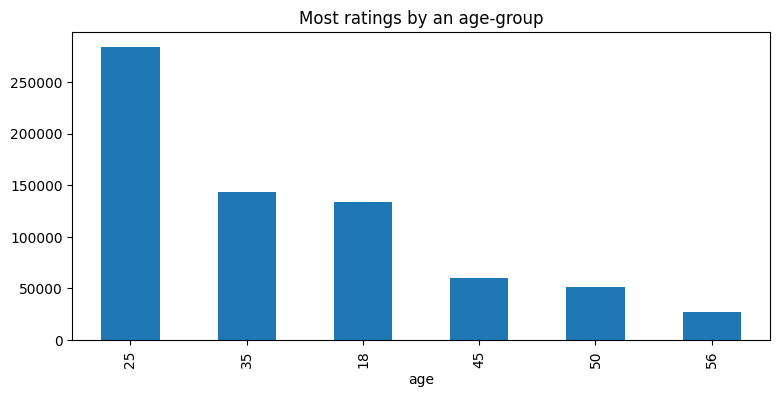

In [105]:
# Most ratings by an agegroup
plt.figure(figsize=(9,4))

Q1.groupby(['age'])['rating'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Most ratings by an age-group',fontsize=12,fontname='Comic Sans MS')
plt.show()

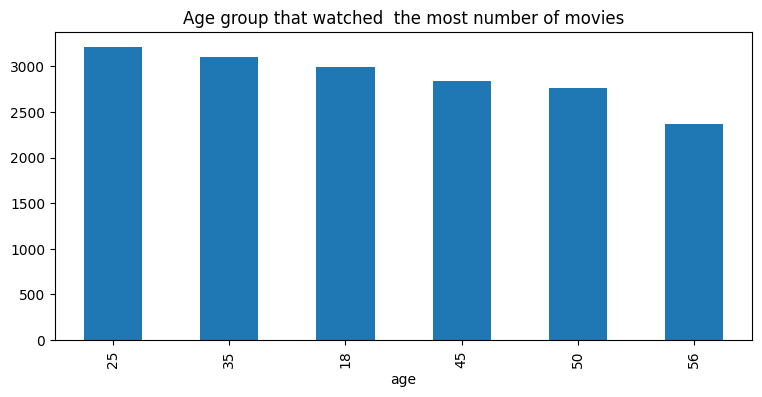

In [106]:
# Age group that watched  the most number of movies
plt.figure(figsize=(9,4))

Q1.groupby(['age'])['movie_id'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.title('Age group that watched  the most number of movies',fontsize=12,fontname='Comic Sans MS')

plt.show()

---
---
###  Users belonging to which profession have watched and rated the most movies?

In [107]:
mapit = {0: "other", 1: "academic/educator" ,2: "artist" ,3: "clerical/admin" ,4: "college/grad student" ,5: "customer service" ,6: "doctor/health care" ,7: "executive/managerial" ,8: "farmer" ,9: "homemaker" ,10: "K-12 student" ,11: "lawyer" ,12: "programmer" ,13: "retired" ,14: "sales/marketing" ,15: "scientist" ,16: "self-employed" ,17: "technician/engineer" ,18: "tradesman/craftsman" ,19: "unemployed", 20: "writer"}

df3['occupation'] = df3['occupation'].map(mapit)

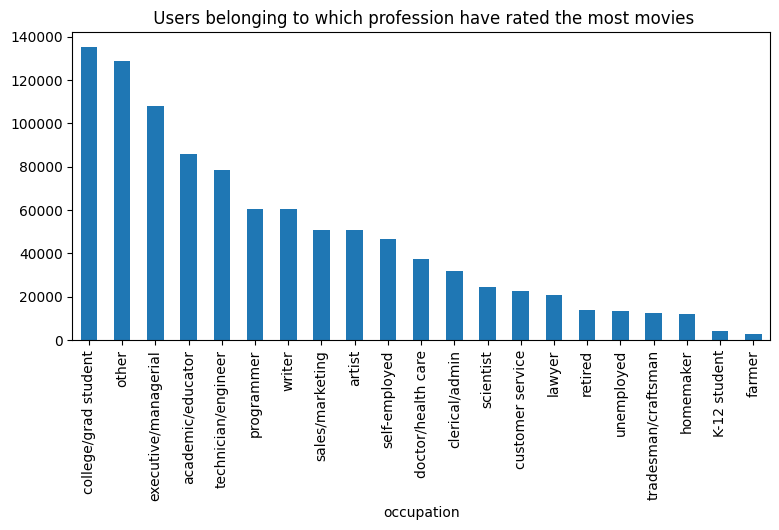

In [108]:
# Most ratings by an agegroup
plt.figure(figsize=(9,4))

df3.groupby(['occupation'])['rating'].count().sort_values(ascending=False).plot(kind='bar')
plt.title(' Users belonging to which profession have rated the most movies',fontsize=12,fontname='Comic Sans MS')
plt.show()

In [109]:
df3

,user_id,movie_id,rating,timestamp,date,hours,gender,age,occupation,zip_code,title,genres,release_year
115541,4956,1084,4,962638726,2000-03-07,15,M,35,scientist,77007,Bonnie and Clyde,Drama,1967
361393,1873,3155,4,974740115,2000-11-20,17,M,35,executive/managerial,2127,Anna and the King,Romance,1999
6098,502,1197,5,976210655,2000-07-12,17,M,35,doctor/health care,55126,"Princess Bride, The",Adventure,1987
792171,3441,122,2,967308615,2000-08-26,16,F,25,sales/marketing,94109,Boomerang,Comedy,1992
473069,193,1374,3,1035342850,2002-10-23,3,F,45,scientist,44106,Star Trek: The Wrath of Khan,Sci-Fi,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263553,1944,1127,5,974692037,2000-11-20,3,F,18,college/grad student,93107,"Abyss, The",Adventure,1989
865084,2106,2491,2,975439895,2000-11-28,19,F,18,writer,495321,Simply Irresistible,Comedy,1999
274216,2581,3744,3,974065088,2000-12-11,21,M,25,lawyer,60611,Shaft,Crime,2000
869660,1755,2443,3,1037947827,2002-11-22,6,F,18,college/grad student,77005,Playing by Heart,Romance,1998


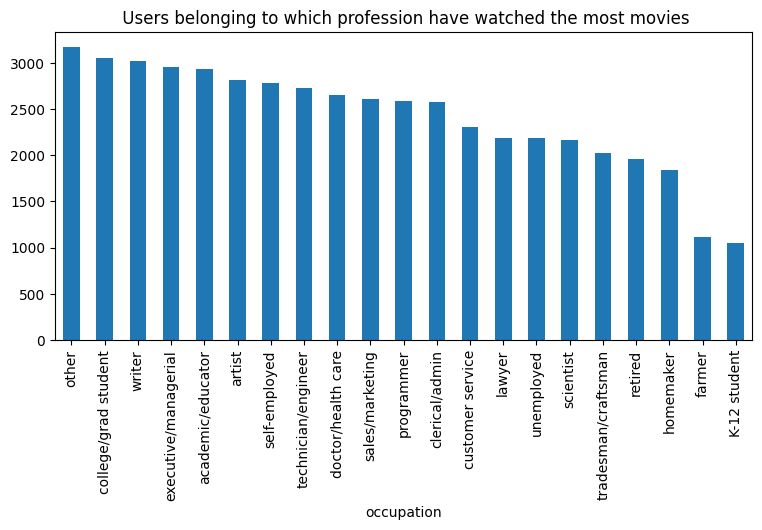

In [110]:
# Age group that watched  the most number of movies
plt.figure(figsize=(9,4))
df3.groupby(['occupation'])['movie_id'].nunique().sort_values(ascending=False).plot(kind='bar')
plt.title(' Users belonging to which profession have watched the most movies',fontsize=12,fontname='Comic Sans MS')

plt.show()

In [111]:
df3.head()

,user_id,movie_id,rating,timestamp,date,hours,gender,age,occupation,zip_code,title,genres,release_year
115541,4956,1084,4,962638726,2000-03-07,15,M,35,scientist,77007,Bonnie and Clyde,Drama,1967
361393,1873,3155,4,974740115,2000-11-20,17,M,35,executive/managerial,2127,Anna and the King,Romance,1999
6098,502,1197,5,976210655,2000-07-12,17,M,35,doctor/health care,55126,"Princess Bride, The",Adventure,1987
792171,3441,122,2,967308615,2000-08-26,16,F,25,sales/marketing,94109,Boomerang,Comedy,1992
473069,193,1374,3,1035342850,2002-10-23,3,F,45,scientist,44106,Star Trek: The Wrath of Khan,Sci-Fi,1982


---
---
### Most of the users in our dataset who’ve rated the movies are Male. (T/F)

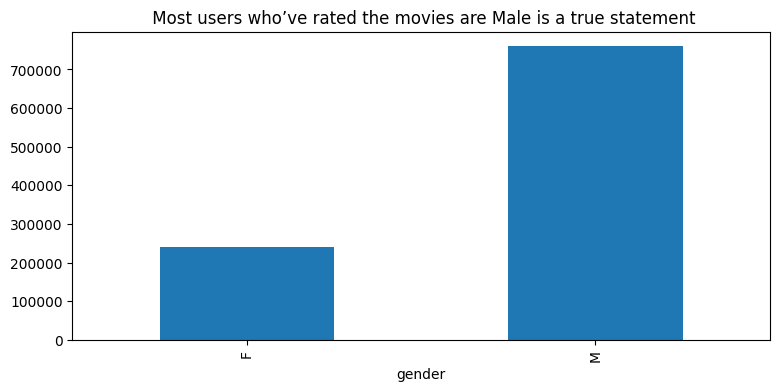

In [112]:
plt.figure(figsize=(9,4))
df3.groupby(['gender'])['rating'].count().plot(kind='bar')
plt.title(' Most users who’ve rated the movies are Male is a true statement',fontsize=12,fontname='Comic Sans MS')
plt.show()

---
---
### Most of the movies present in our dataset were released in which decade?

```70s b. 90s c. 50s d.80s```

In [113]:
n = df3.groupby(['release_year'])['movie_id'].nunique().sort_values(ascending=False).reset_index()

In [114]:
bins = [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]

label = ['20s','30s','40s','50s','60s','70s','80s','90s','100s']
n['release_year_'] = pd.cut(n['release_year'],bins,labels=label)

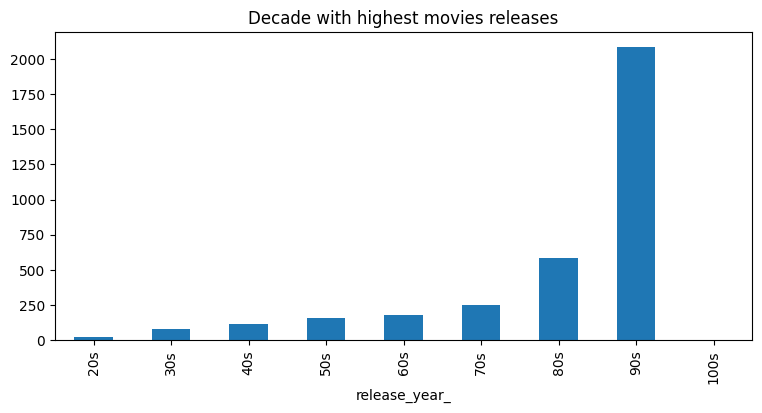

In [115]:
plt.figure(figsize=(9,4))
n.groupby('release_year_')['movie_id'].sum().plot(kind='bar')
plt.title('Decade with highest movies releases',fontsize=12,fontname='Comic Sans MS')
plt.show()

---
---
### The movie with maximum no. of ratings is ___.

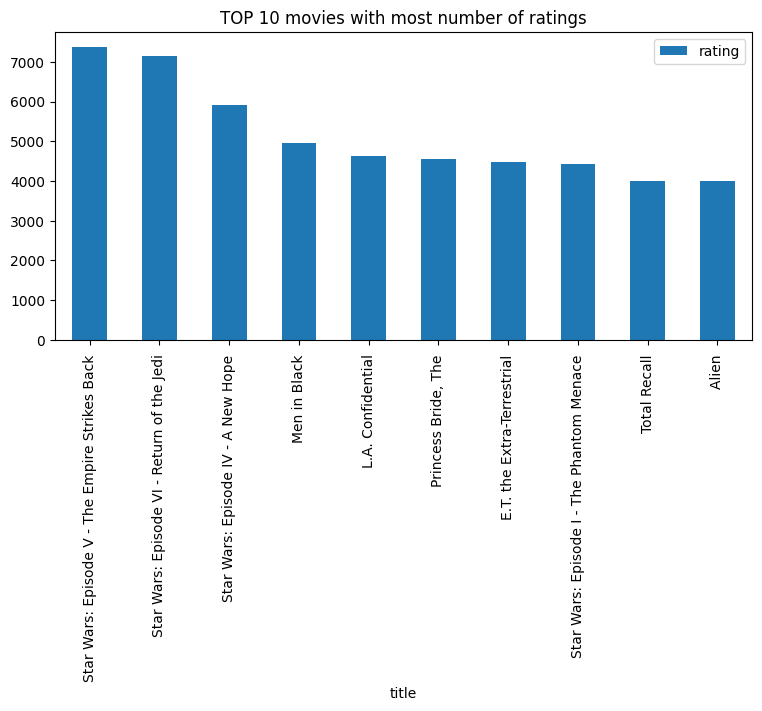

In [125]:
df3.groupby("title")["rating"].count().reset_index().sort_values(by="rating",ascending=False).set_index('title').head(10).plot(kind='bar',figsize=(9,4))
plt.title('TOP 10 movies with most number of ratings',fontsize=12,fontname='Comic Sans MS')
plt.show()

---
---
### Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

In [128]:
recommend_movie_based_on_correlation('Liar Liar')[:3]

Liar Liar (1997)
1485


117    Steal Big, Steal Little (1995)
407               You So Crazy (1994)
658                   Faithful (1996)
Name: title, dtype: object

---
---
### On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.

***ITEM-ITEM BASED AND USER-USER BASED***

---
---
### Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.

***Pearson Correlation ranges from -1 to 1, whereas Cosine Similarity ranges from 0 to 1.***

---
---
### Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.

In [131]:
print('MAPE : ',mape(rm.values[rm > 0], rm__[rm > 0]),'\n')
print('RMSE :',np.sqrt(mse(rm.values[rm > 0], rm__[rm > 0])))

MAPE :  0.3796718211689346 

RMSE : 1.3321351755683746


---
---
### Give the sparse ‘row’ matrix representation for the following dense matrix -

[[1 0]
[3 7]]

In [132]:
import numpy as np
from scipy.sparse import coo_matrix

dense_matrix = np.array([[1, 0], [3, 7]])
sparse_matrix = coo_matrix(dense_matrix)
print(sparse_matrix)

  (0, 0)	1
  (1, 0)	3
  (1, 1)	7


---
---
### 5 Top rated Recommended Movies as per age :

In [142]:
age_groups = df3.age.unique()

In [143]:
for age_ in age_groups:
  print(age_)
  print("------")
  print(df3[df3.age == age_].groupby("title")["rating"].count().sort_values(ascending=False).head())
  print()
  print()
  print()

35
------
title
Star Wars: Episode V - The Empire Strikes Back     1539
Star Wars: Episode VI - Return of the Jedi         1381
Star Wars: Episode IV - A New Hope                 1269
Men in Black                                       1008
E.T. the Extra-Terrestrial                          967
Name: rating, dtype: int64



25
------
title
Star Wars: Episode V - The Empire Strikes Back     2975
Star Wars: Episode VI - Return of the Jedi         2932
Star Wars: Episode IV - A New Hope                 2318
Princess Bride, The                                2008
Men in Black                                       1972
Name: rating, dtype: int64



45
------
title
Star Wars: Episode V - The Empire Strikes Back     568
Star Wars: Episode VI - Return of the Jedi         545
Star Wars: Episode IV - A New Hope                 485
E.T. the Extra-Terrestrial                         406
L.A. Confidential                                  399
Name: rating, dtype: int64



18
------
title
Star Wars: 

---
---
# Questions and Answers :
---
---



#### 1) Users of which age group have watched and rated the most number of movies?

- **age group 25-35**


#### 2) Users belonging to which profession have watched and rated the most movies?

- **College Graduate Students and Other category**


#### 3) Most of the users in our dataset who’ve rated the movies are Male. (T/F)

- **Male(True)**

#### 4) Most of the movies present in our dataset were released in which decade?

- **90s**


#### 5) The movie with maximum no. of ratings is ___.

- **Star Wars: Episode V - The Empire Strikes Back**


#### 6) Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.


-
**Steal Big, Steal Little (1995)**

-
**You So Crazy (1994)**

-
**Faithful (1996)**



#### 7) On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.

- **item and User**


#### 8) Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.
-
**Pearson Correlation ranges between -1 to +1**

-
**Cosine Similarity belongs to the interval between 0 to 1**





#### 9) Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.


**User-based Model :**

-
MAPE :  0.3796718211689346 

-
RMSE : 1.3321351755683746



#### 10) Give the sparse ‘row’ matrix representation for the following dense matrix -

**[[1 0],[3 7]]**

 - ans  :
  (0, 0)	1
  (1, 0)	3
  (1, 1)  7

---
---